In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [26]:
import pandas as pd

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns 

### Import Dataset

In [3]:
df = pd.read_csv("pokemon.csv")
df[:3]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Data Preparation

In [4]:
df.shape

(800, 13)

In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.describe(exclude = "number")

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Bidoof,Water,Flying,False
freq,1,112,97,735


In [7]:
# Delete unnecessary columns and the columns which have low standard deviation
df = df[df.columns.drop(["#", "Generation", "Legendary"])]
df[:3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80


### Import Iris Data

In [17]:
dfi = pd.read_csv("iris.csv")
dfi[:3]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


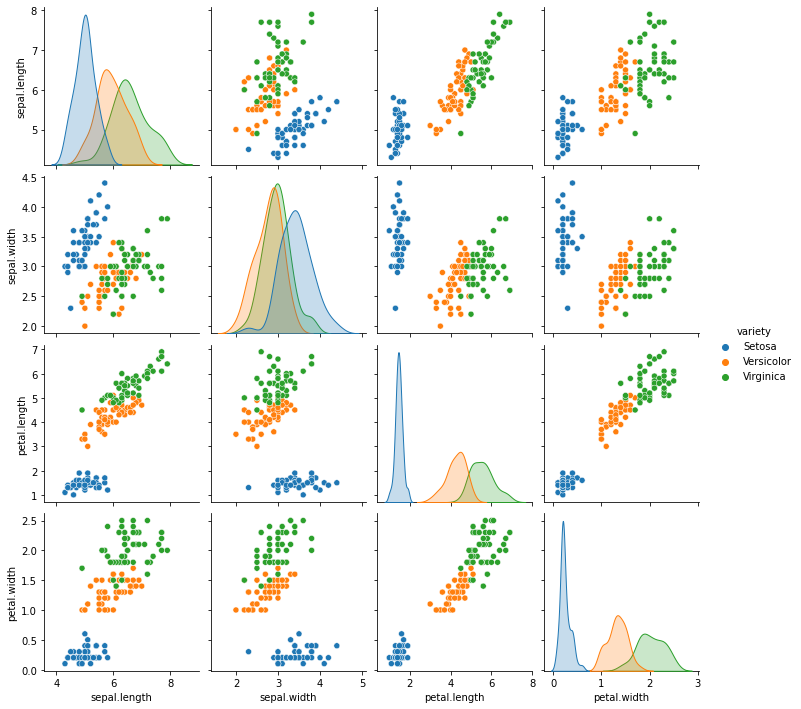

In [18]:
sns.pairplot(dfi, hue = "variety")

### Inmport Ansur Female Dataset

In [34]:
df_f = pd.read_csv("Ansur_Female.csv")
df_f[:3]

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall


In [35]:
df_f.shape

(1986, 99)

**Remove Non-Numeric Columns from Dataset**

In [36]:
non_numeric = ["BMI_class", "Height_class", "Gender", "Component", "Branch"]

df_numeric = df_f.drop(non_numeric, axis = 1)
df_numeric.shape

(1986, 94)

**t-SNE visualization of high-dimensional data**

In [37]:
m = TSNE(learning_rate = 50)

tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4, :]

array([[-39.89548 ,  -9.798676],
       [-25.225534, -23.705511],
       [ 10.747341, -24.093142]], dtype=float32)

In [38]:
df_f["x"] = tsne_features[:, 0]
df_f["y"] = tsne_features[:, 1]

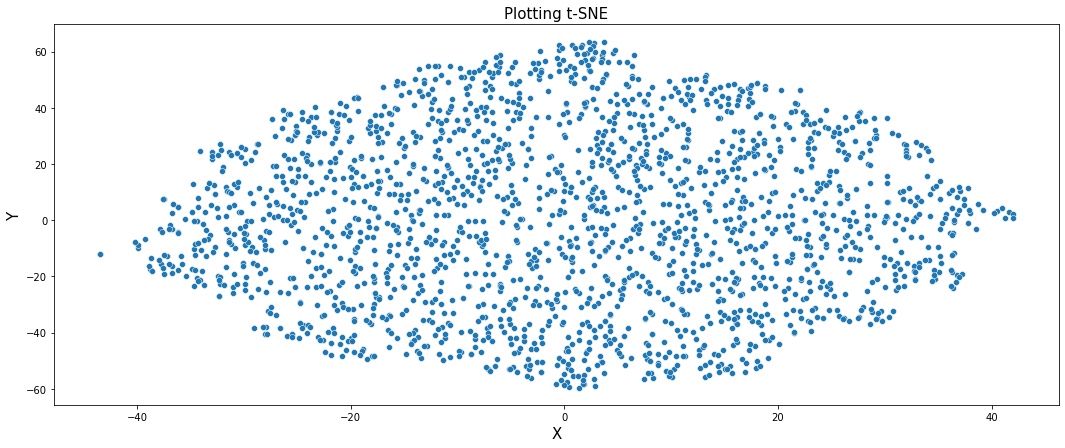

In [39]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x", y = "y", data = df_f)
plt.title("Plotting t-SNE", size = 15)
plt.xlabel("X", size = 15)
plt.ylabel("Y", size = 15)
plt.show()

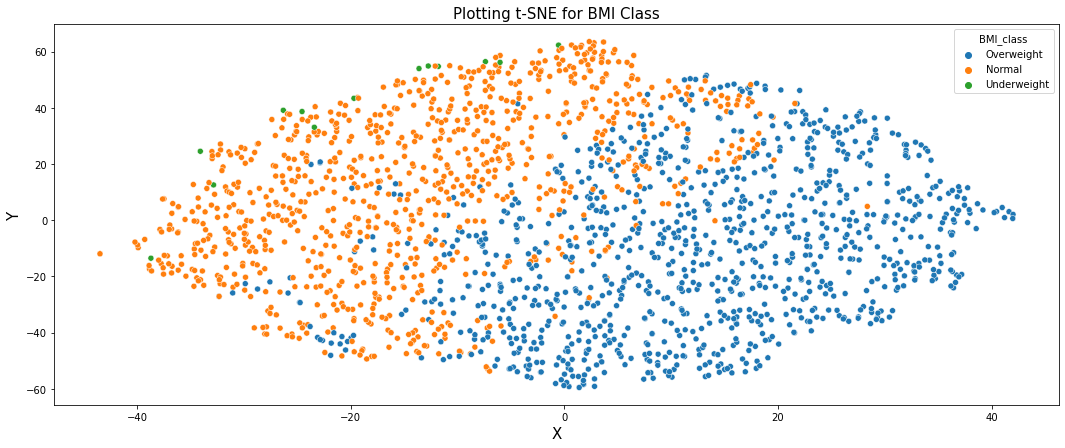

In [42]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x", y = "y", hue = "BMI_class", data = df_f)
plt.title("Plotting t-SNE for BMI Class", size = 15)
plt.xlabel("X", size = 15)
plt.ylabel("Y", size = 15)
plt.show()

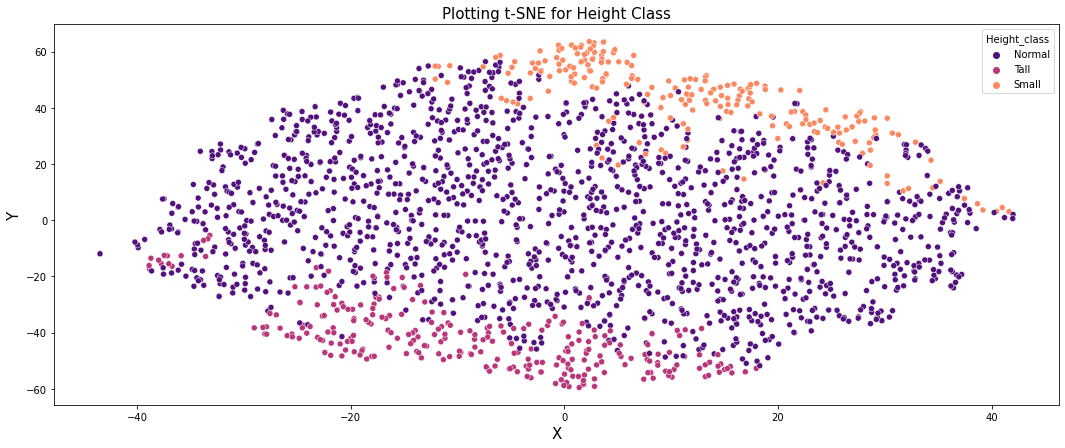

In [50]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x", y = "y", hue = "Height_class", data = df_f, palette = "magma")
plt.title("Plotting t-SNE for Height Class", size = 15)
plt.xlabel("X", size = 15)
plt.ylabel("Y", size = 15)
plt.show()